In [2]:
%matplotlib inline

import csv
import numpy as np
from matplotlib import pyplot
from sklearn import cluster

In [44]:
data = []
with open('old_faithful_geyser_data.csv', 'r') as csvfile:
    csvfile.readline()
    for l in csvfile:
        eruption_time, waiting_time = str(l).split(',')
        data.append([float(eruption_time), float(waiting_time)])

data = np.array(data)
print(data)

[[ 3.6   79.   ]
 [ 1.8   54.   ]
 [ 3.333 74.   ]
 [ 2.283 62.   ]
 [ 4.533 85.   ]
 [ 2.883 55.   ]
 [ 4.7   88.   ]
 [ 3.6   85.   ]
 [ 1.95  51.   ]
 [ 4.35  85.   ]
 [ 1.833 54.   ]
 [ 3.917 84.   ]
 [ 4.2   78.   ]
 [ 1.75  47.   ]
 [ 4.7   83.   ]
 [ 2.167 52.   ]
 [ 1.75  62.   ]
 [ 4.8   84.   ]
 [ 1.6   52.   ]
 [ 4.25  79.   ]
 [ 1.8   51.   ]
 [ 1.75  47.   ]
 [ 3.45  78.   ]
 [ 3.067 69.   ]
 [ 4.533 74.   ]
 [ 3.6   83.   ]
 [ 1.967 55.   ]
 [ 4.083 76.   ]
 [ 3.85  78.   ]
 [ 4.433 79.   ]
 [ 4.3   73.   ]
 [ 4.467 77.   ]
 [ 3.367 66.   ]
 [ 4.033 80.   ]
 [ 3.833 74.   ]
 [ 2.017 52.   ]
 [ 1.867 48.   ]
 [ 4.833 80.   ]
 [ 1.833 59.   ]
 [ 4.783 90.   ]
 [ 4.35  80.   ]
 [ 1.883 58.   ]
 [ 4.567 84.   ]
 [ 1.75  58.   ]
 [ 4.533 73.   ]
 [ 3.317 83.   ]
 [ 3.833 64.   ]
 [ 2.1   53.   ]
 [ 4.633 82.   ]
 [ 2.    59.   ]
 [ 4.8   75.   ]
 [ 4.716 90.   ]
 [ 1.833 54.   ]
 [ 4.833 80.   ]
 [ 1.733 54.   ]
 [ 4.883 83.   ]
 [ 3.717 71.   ]
 [ 1.667 64.   ]
 [ 4.567 77.  

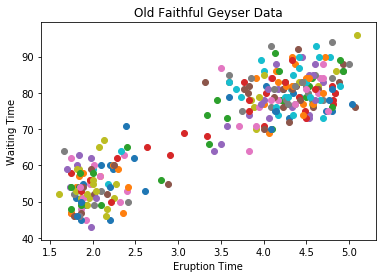

In [12]:
for eruption_time, waiting_time in data:
    pyplot.scatter(eruption_time, waiting_time)

pyplot.title('Old Faithful Geyser Data')
pyplot.xlabel('Eruption Time')
pyplot.ylabel('Waiting Time')
pyplot.show()

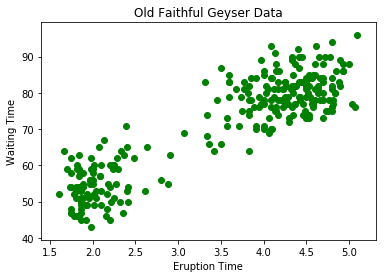

In [19]:
for eruption_time, waiting_time in data:
    pyplot.scatter(eruption_time, waiting_time,c='g')#g here indicates colour green

pyplot.title('Old Faithful Geyser Data')
pyplot.xlabel('Eruption Time')
pyplot.ylabel('Waiting Time')
pyplot.show()

In [23]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
centroids = kmeans.cluster_centers_

print(centroids)

[[ 4.37731522 84.48913043]
 [ 2.05673404 54.05319149]
 [ 4.10036047 74.76744186]]


In [25]:
labels = kmeans.predict(data)

print(labels)

[2 1 2 1 0 1 0 0 1 0 1 0 2 1 0 1 1 0 1 2 1 1 2 2 2 0 1 2 2 2 2 2 2 0 2 1 1
 0 1 0 0 1 0 1 2 0 1 1 0 1 2 0 1 0 1 0 2 1 2 0 1 0 1 0 1 0 2 2 2 2 0 1 2 2
 1 2 1 2 2 0 2 0 2 2 2 0 2 0 1 0 1 0 1 2 1 2 0 2 1 0 1 0 1 0 0 1 0 1 0 0 2
 1 0 2 1 0 1 0 1 0 1 2 2 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2 0 1 0 2 2 1 0 1
 0 1 2 2 2 0 2 2 0 0 1 0 1 0 1 2 2 2 1 0 1 0 1 1 2 2 0 0 2 1 0 2 1 2 0 0 1
 2 0 1 0 1 0 1 2 0 2 0 0 2 1 2 1 0 0 1 2 1 2 0 1 0 2 0 1 2 1 2 1 0 1 2 1 0
 1 2 2 2 2 2 2 2 2 1 0 1 0 1 1 2 2 1 2 1 0 1 0 0 1 0 2 2 1 0 2 2 0 0 2 0 1
 2 2 0 1 0 1 1 2 0 1 0 1 2]


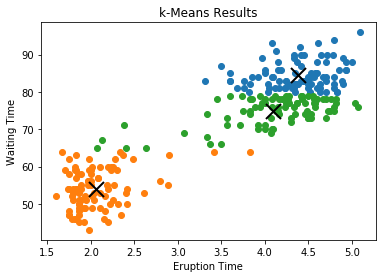

In [45]:
for each in range(k):
    selected_data = data[np.where(labels==each)]
    pyplot.plot(selected_data[:, 0], selected_data[:, 1], 'o')
    lines = pyplot.plot(centroids[each, 0], centroids[each, 1], 'kx')
    pyplot.setp(lines, markersize=15.0, markeredgewidth=2.0)

pyplot.title('k-Means Results')
pyplot.xlabel('Eruption Time')
pyplot.ylabel('Waiting Time')
pyplot.show()